# 🧩 Agrupamiento en Pandas: `groupby()`

## 🎯 Objetivo de la sesión
Aprender a agrupar datos por una o varias columnas y aplicar funciones de agregación para resumir la información.

---

## 💡 Introducción

El método `groupby()` en Pandas permite **dividir** un DataFrame en grupos, **aplicar** operaciones sobre cada grupo y luego **combinar** los resultados.

Este proceso se conoce como el patrón:
> **Dividir → Aplicar → Combinar**


sintaxis:

`df.groupby('columna')['otra_columna'].operación()`

---

## 🧱 Ejemplo básico

Supongamos que tenemos un DataFrame con información de ventas:



## 🧩 DataFrame de Ventas (20 filas)

Este conjunto de datos simula las ventas mensuales realizadas por varios vendedores en distintas regiones y categorías de productos.

---

### 📘 Diccionario de variables

| Variable | Tipo | Descripción |
|-----------|------|--------------|
| `Vendedor` | Categórica | Nombre del vendedor |
| `Región` | Categórica | Región donde se realizó la venta (`Norte` o `Sur`) |
| `Ventas` | Numérica | Valor total de la venta (en miles de pesos) |
| `Productos` | Numérica | Cantidad de productos vendidos |
| `Mes` | Categórica | Mes en el que se realizó la venta |
| `Categoría` | Categórica | Tipo de producto (`Electrónica`, `Hogar`, `Ropa`) |

---



In [3]:

import pandas as pd
import numpy as np

np.random.seed(2)

data = {
    'Vendedor': np.random.choice(['Ana', 'Luis', 'Carlos', 'Marta'], 20),
    'Región': np.random.choice(['Norte', 'Sur'], 20),
    'Ventas': np.random.randint(100, 500, 20),
    'Productos': np.random.randint(1, 10, 20),
    'Mes': np.random.choice(['Enero', 'Febrero', 'Marzo', 'Abril'], 20),
    'Categoría': np.random.choice(['Electrónica', 'Hogar', 'Ropa'], 20)
}

df = pd.DataFrame(data)
df.head(20)

,Vendedor,Región,Ventas,Productos,Mes,Categoría
0,Ana,Norte,296,8,Febrero,Ropa
1,Marta,Norte,402,2,Enero,Electrónica
2,Luis,Sur,451,7,Enero,Electrónica
3,Ana,Sur,311,9,Febrero,Hogar
4,Carlos,Sur,221,6,Febrero,Hogar
5,Marta,Norte,131,4,Marzo,Hogar
6,Carlos,Norte,180,1,Febrero,Electrónica
7,Marta,Norte,152,1,Febrero,Electrónica
8,Ana,Sur,338,3,Febrero,Ropa
9,Marta,Sur,150,9,Febrero,Ropa


## ⚙️ Agrupar por una columna

In [4]:
# Ventas totales por vendedor
df.groupby('Vendedor')['Ventas'].mean()


,Ventas
Vendedor,
Ana,359.250000
Carlos,241.500000
Luis,306.000000
Marta,284.777778


In [5]:
# Promedio de productos vendidos por región
df.groupby('Región')['Productos'].mean()

,Productos
Región,
Norte,4.3
Sur,6.9


**Esto devuelve una Serie donde el índice es la columna agrupada.**

## ⚙️ Agrupar por múltiples columnas

In [6]:
df.groupby(['Vendedor', 'Región'])['Ventas'].mean()


Vendedor  Región
Ana       Norte     394.0
          Sur       324.5
Carlos    Norte     180.0
          Sur       262.0
Luis      Norte     233.5
          Sur       451.0
Marta     Norte     299.8
          Sur       266.0
Name: Ventas, dtype: float64

**El resultado tiene un índice múltiple (MultiIndex).**

In [7]:
df.groupby(['Vendedor', 'Región'])['Ventas'].sum()


Vendedor  Región
Ana       Norte      788
          Sur        649
Carlos    Norte      180
          Sur        786
Luis      Norte      467
          Sur        451
Marta     Norte     1499
          Sur       1064
Name: Ventas, dtype: int64

In [10]:
ventas_por_vendedor = df.groupby('Vendedor')['Ventas'].sum()
vendedor_top = ventas_por_vendedor.idxmax()
print(f"El vendedor con más ventas es: {vendedor_top}")

El vendedor con más ventas es: Marta


# ⚗️ Aplicar varias funciones de agregación

In [11]:
# Varias funciones sobre una misma variable
df.groupby('Vendedor')['Ventas'].agg(['mean', 'sum', 'max'])


,mean,sum,max
Vendedor,,,
Ana,359.250000,1437,492
Carlos,241.500000,966,333
Luis,306.000000,918,451
Marta,284.777778,2563,419


## 🧮 Agregaciones personalizadas

In [12]:
df.groupby('Vendedor')['Productos'].agg(["mean","max",lambda x: x.mean() / x.max()])


,mean,max,<lambda_0>
Vendedor,,,
Ana,5.750000,9,0.638889
Carlos,6.250000,9,0.694444
Luis,5.666667,7,0.809524
Marta,5.222222,9,0.580247


##  Diferentes funciones a distintas columnas

In [14]:
df.groupby('Vendedor').agg({
    'Ventas': ['mean', 'sum'],
    'Productos': 'max'
})


Ventas       Productos
                mean   sum       max
Vendedor                            
Ana       359.250000  1437         9
Carlos    241.500000   966         9
Luis      306.000000   918         7
Marta     284.777778  2563         9

## 🔁 Restablecer el índice después de agrupar

Por defecto, el resultado de groupby() usa las columnas agrupadas como índice.
Podemos devolverlas como columnas normales con reset_index():

In [15]:
df.groupby('Vendedor')['Ventas'].sum().reset_index()


,Vendedor,Ventas
0,Ana,1437
1,Carlos,966
2,Luis,918
3,Marta,2563


In [16]:
df.groupby('Vendedor')['Ventas'].sum()

,Ventas
Vendedor,
Ana,1437
Carlos,966
Luis,918
Marta,2563


## Contar elementos con count() y size()

In [17]:
#  Cantidad de registros por vendedor
df.groupby('Vendedor').size()

,0
Vendedor,
Ana,4
Carlos,4
Luis,3
Marta,9


In [24]:
# Cantidad de ventas por región y mes
df.groupby(['Región', 'Mes']).size()
df.groupby(['Región', 'Mes']).size().reset_index()
df.groupby(['Región', 'Mes']).size().reset_index(name='Conteo')

,Región,Mes,Conteo
0,Norte,Abril,1
1,Norte,Enero,3
2,Norte,Febrero,3
3,Norte,Marzo,3
4,Sur,Abril,1
5,Sur,Enero,2
6,Sur,Febrero,5
7,Sur,Marzo,2


## Ordenar resultados agrupados

In [27]:
df.groupby('Vendedor')['Ventas'].sum()
#Permite identificar a los vendedores con mejores resultados.
df.groupby('Vendedor')['Ventas'].sum().sort_values(ascending=True)

,Ventas
Vendedor,
Luis,918
Carlos,966
Ana,1437
Marta,2563


## Visualizaciones con agrupamientos

<Axes: title={'center': 'Promedio de Ventas por Categoría'}, xlabel='Categoría'>

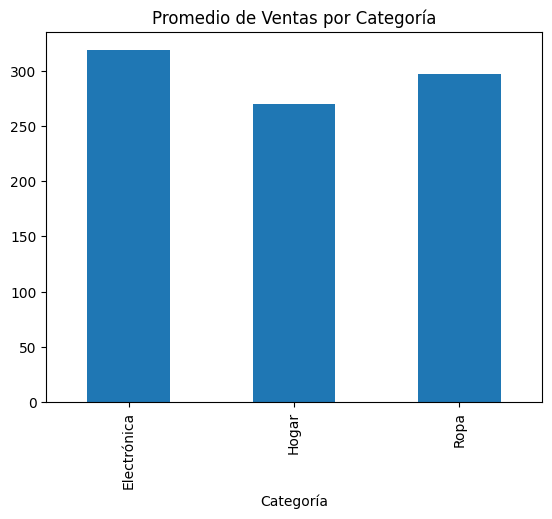

In [28]:
df.groupby('Categoría')['Ventas'].mean().plot(kind='bar', title='Promedio de Ventas por Categoría')


# 🧮 Funciones más usadas con `groupby()` en Pandas

Las funciones que se aplican sobre un `groupby()` sirven para **resumir o transformar los datos** dentro de cada grupo.

---

## 🔹 1. Funciones básicas de agregación

| Función | Descripción | Ejemplo |
|----------|--------------|----------|
| `sum()` | Suma de los valores | `df.groupby('Región')['Ventas'].sum()` |
| `mean()` | Promedio (media) | `df.groupby('Categoría')['Ventas'].mean()` |
| `max()` | Valor máximo | `df.groupby('Vendedor')['Ventas'].max()` |
| `min()` | Valor mínimo | `df.groupby('Vendedor')['Ventas'].min()` |
| `count()` | Cuenta los valores no nulos | `df.groupby('Región')['Ventas'].count()` |
| `size()` | Cuenta el total de elementos por grupo (nulos y no nulos) | `df.groupby('Mes').size()` |
| `median()` | Mediana | `df.groupby('Categoría')['Ventas'].median()` |

---

## 🔹 2. Funciones estadísticas y de dispersión

| Función | Descripción | Ejemplo |
|----------|--------------|----------|
| `std()` | Desviación estándar | `df.groupby('Vendedor')['Ventas'].std()` |
| `var()` | Varianza | `df.groupby('Vendedor')['Ventas'].var()` |
| `sem()` | Error estándar de la media | `df.groupby('Región')['Ventas'].sem()` |
| `prod()` | Producto de todos los valores | `df.groupby('Categoría')['Productos'].prod()` |
| `first()` | Primer valor del grupo | `df.groupby('Vendedor')['Ventas'].first()` |
| `last()` | Último valor del grupo | `df.groupby('Vendedor')['Ventas'].last()` |
| `nunique()` | Número de valores únicos | `df.groupby('Región')['Mes'].nunique()` |

---

# 🧩 Taller: Análisis de uso de una aplicación con Pandas (`groupby()`)

## 🎯 Contexto
Una empresa tecnológica quiere analizar el comportamiento de sus usuarios en una aplicación móvil.  
El área de analítica ha recopilado una muestra de 100 usuarios con variables relacionadas con su uso, país y nivel de satisfacción.

---

## 📘 Diccionario de variables

| Variable | Tipo | Descripción |
|-----------|------|--------------|
| `Usuario` | Categórica | Identificador único del usuario (user_1, user_2, …) |
| `País` | Categórica | País de residencia del usuario (`México`, `Argentina`, `Colombia`) |
| `Minutos_diarios` | Numérica (entera) | Tiempo promedio que el usuario pasa en la app cada día |
| `Satisfacción` | Categórica | Nivel de satisfacción declarado (`Alta`, `Media`, `Baja`) |
| `Sesiones_diarias` | Numérica (entera) | Cantidad promedio de veces que el usuario abre la app por día |
| `Género` | Categórica | Género reportado del usuario (`Femenino`, `Masculino`, `Otro`) |
| `Plan` | Categórica | Tipo de plan que tiene el usuario (`Gratis`, `Básico`, `Premium`) |

---

## 💻 Creación del DataFrame



In [29]:

import pandas as pd
import numpy as np

np.random.seed(1)

data = {
    'Usuario': [f'user_{i}' for i in range(1, 101)],
    'País': np.random.choice(['México', 'Argentina', 'Colombia'], 100),
    'Minutos_diarios': np.random.randint(10, 300, 100),
    'Satisfacción': np.random.choice(['Alta', 'Media', 'Baja'], 100),
    'Sesiones_diarias': np.random.randint(1, 10, 100),
    'Género': np.random.choice(['Femenino', 'Masculino', 'Otro'], 100),
    'Plan': np.random.choice(['Gratis', 'Básico', 'Premium'], 100)
}

usuarios = pd.DataFrame(data)
usuarios.head()


,Usuario,País,Minutos_diarios,Satisfacción,Sesiones_diarias,Género,Plan
0,user_1,Argentina,86,Baja,2,Otro,Gratis
1,user_2,México,159,Baja,3,Femenino,Premium
2,user_3,México,213,Baja,1,Femenino,Premium
3,user_4,Argentina,273,Baja,5,Masculino,Gratis
4,user_5,Argentina,87,Media,8,Femenino,Premium


In [38]:
usuarios(["País","Minutos_diarios"])

TypeError: 'DataFrame' object is not callable

In [35]:
usuarios[usuarios["Minutos_diarios"]==usuarios["Minutos_diarios"].max()]


,Usuario,País,Minutos_diarios,Satisfacción,Sesiones_diarias,Género,Plan
76,user_77,Colombia,298,Media,3,Otro,Gratis



##  1. Calcular promedios de las variables numéricas

Calcula el promedio de las columnas:

- `Minutos_diarios`  
- `Sesiones_diarias`

---

##  2. Contar valores de las variables categóricas

Usa `value_counts()` para saber cuántos usuarios hay por categoría en:

- `País`  
- `Satisfacción`  
- `Plan`  
- `Género`

---

##  3. Usuario con mayor tiempo en minutos diarios

Determina:

- Qué usuario tiene el **mayor valor de `Minutos_diarios`**.  
- Qué **género** y **plan** tiene ese usuario.

---

##  4. Filtrado de usuarios según condiciones

a) ¿Cuántos usuarios hacen **3 o 4 sesiones diarias**?  

b) ¿Cuántos usuarios **no tienen plan “Premium”** y además tienen **satisfacción “Baja”**?

---

##  5. Ordenar usuarios de Argentina

Filtra los usuarios que viven en **Argentina** y ordénalos de **menor a mayor** según su tiempo en `Minutos_diarios`.

---

##  6. Crear una nueva variable `valor_satisfaccion`

Crea una nueva columna llamada `valor_satisfaccion`, donde:

- “Baja” = 1  
- “Media” = 2  
- “Alta” = 3  

Muestra las primeras filas para verificar el resultado.

---

##  7. Eliminar el usuario con menor tiempo de uso

Elimina del DataFrame el usuario con el **menor valor de `Minutos_diarios`**.  
Muestra el tamaño del DataFrame antes y después de eliminarlo.

---

##  8.  Ejercicios básicos con `groupby()`

### 🔹 1. Promedio de minutos por país
Agrupa los datos por país y calcula el **promedio de minutos diarios**.

---

### 🔹 2. Promedio de sesiones por plan
Agrupa por tipo de plan (`Plan`) y calcula el **promedio de sesiones diarias**.

---

### 🔹 3. Promedio de minutos por satisfacción
Agrupa por nivel de satisfacción (`Satisfacción`) y calcula el **promedio de minutos diarios**.

---

### 🔹 4. Total de usuarios por país
Cuenta cuántos usuarios hay en cada país usando `groupby()` y la función `count()` o `size()`.

---

### 🔹 5. Promedio de minutos y sesiones por país
Agrupa por país y calcula simultáneamente el promedio de:
- `Minutos_diarios`
- `Sesiones_diarias`

---

### 🔹 6. Promedio de minutos por país y por plan
Agrupa por país y plan, y calcula el **promedio de minutos diarios** para cada combinación.

---

### 🔹 7. Máximo de minutos por país
Encuentra el **mayor valor de minutos diarios** en cada país.

---

### 🔹 8. Cantidad de usuarios por género y país
Agrupa por `País` y `Género`, y cuenta cuántos usuarios hay en cada grupo.

---

### 🔹 9. Promedio de minutos y sesiones por satisfacción
Agrupa por `Satisfacción` y calcula el **promedio de minutos diarios** y de **sesiones diarias**.

---

### 🔹 10. Promedio de minutos por plan y satisfacción
Agrupa por `Plan` y `Satisfacción` y calcula el **promedio de minutos diarios**.

---

### 🔹 11. Promedio de minutos por país (ordenado)
Calcula el promedio de `Minutos_diarios` por país y ordena los resultados de mayor a menor.

---

### 🔹 12. Desviación estándar de minutos por país
Agrupa por `País` y calcula la **desviación estándar** de los `Minutos_diarios`.

---

### 🔹 13. Promedio y máximo de minutos por plan
Agrupa por `Plan` y muestra el **promedio y el máximo de minutos diarios**.

---

### 🔹 14. Promedio de minutos por género dentro de cada país
Agrupa por `País` y `Género` y calcula el promedio de `Minutos_diarios`.

---

### 🔹 15. Número de planes distintos por país
Agrupa por `País` y usa `nunique()` para contar cuántos **tipos diferentes de plan** existen en cada país.

---

### 🔹 16. Usuario promedio por país
Agrupa por país y calcula el **promedio general de todas las variables numéricas** (`Minutos_diarios`, `Sesiones_diarias`, `valor_satisfaccion` si existe).

---

### 🔹 17. Resumen completo por país
Usa `describe()` sobre `Minutos_diarios` agrupando por país.

---

### 🔹 18. Promedio por país y género con nombres personalizados
Usa `agg()` para crear un resumen con nombres de columnas personalizados, por ejemplo:
- `Promedio_minutos`
- `Promedio_sesiones`

---

### 🔹 19. País con mayor promedio de minutos
Encuentra qué país tiene el **mayor promedio de minutos diarios**.

---

### 🔹 20. Plan más popular por país
Usa `groupby()` y `value_counts()` para encontrar el **plan más frecuente en cada país**.

